In [188]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import random
import numpy as np

# Import dataset and classifiers
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

In [189]:
# Plot  image samples
def plotSamples(data,rows,cols,trueLabels,predictedLabels=[], inverted_pixel_counts=[]):
    fig, axs = plt.subplots(rows,cols)
    nDigits = data.shape[0]
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    for i in range(rows):
        for j in range(cols):
            index = random.randint(0,nDigits-1)
            axs[i,j].imshow(data[index].reshape(8,8),cmap = 'gray')
            # remove axes titles
            axs[i,j].axis('off')
            title_text = ''
            if (np.any(predictedLabels)):
                title_text = 'Predct: %i,  Real %i' % (predictedLabels[index], trueLabels[index])
            else:
                title_text = 'Real: %i' % trueLabels[index]

            if (len(inverted_pixel_counts) > 0):
                title_text += f' (Inv: {inverted_pixel_counts[index]} px)'

            axs[i,j].set_title(title_text, fontdict={'fontsize': 10})
            # show the figure
    plt.show()

In [190]:
# The digits dataset consisits of 8x8 images of digits
digits = datasets.load_digits()
data = digits.data
trueLabels = digits.target

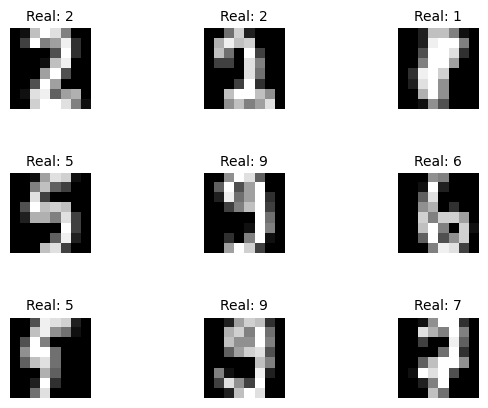

In [191]:
rows = 3
cols = 3
plotSamples(data,rows,cols,trueLabels)

In [192]:
# Split data into train and test subsets
trainData, testData, trainLabels, testLabels = train_test_split(
    data, trueLabels, train_size= 0.5,stratify=trueLabels)

In [193]:
# Train a support vector classifier and predict the test set
classifier = svm.SVC(kernel='rbf', gamma='scale')
classifier.fit(trainData, trainLabels)
predictedLabels = classifier.predict(testData)

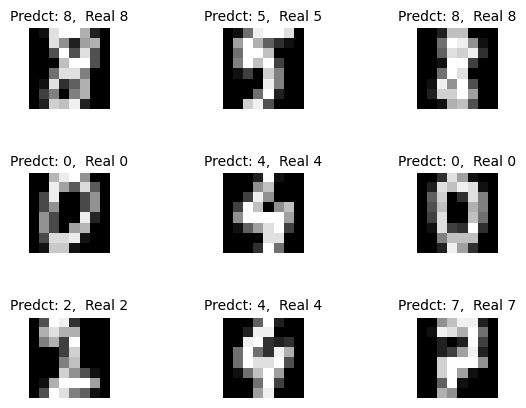

In [194]:
plotSamples(testData,rows,cols,testLabels,predictedLabels)

In [195]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [196]:
cm = confusion_matrix(testLabels, predictedLabels)

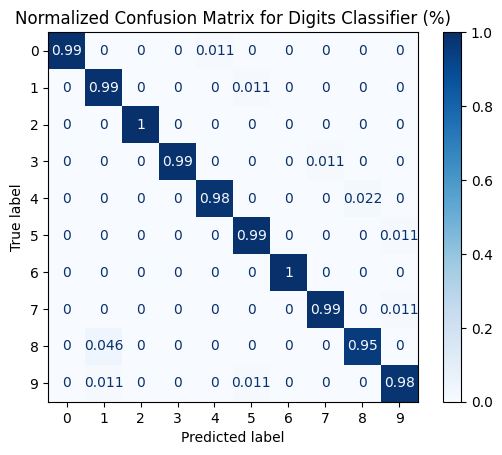

In [197]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Digits Classifier (%)')
plt.show()

In [198]:
inverted_data = np.copy(data)

In [199]:
inverted_pixel_counts_list = [] # New list to store counts

for i in range(len(inverted_data)):
    # Randomly select 0 to 8 pixels to invert
    num_pixels_to_invert = random.randint(0, 8)
    inverted_pixel_counts_list.append(num_pixels_to_invert) # Store the count

    if num_pixels_to_invert > 0:
        # Get the total number of pixels in an image
        total_pixels = inverted_data.shape[1]

        # Generate unique random indices for pixel inversion
        selected_indices = np.random.choice(total_pixels, num_pixels_to_invert, replace=False)

        # Invert the pixel values
        inverted_data[i, selected_indices] = 15 - inverted_data[i, selected_indices]

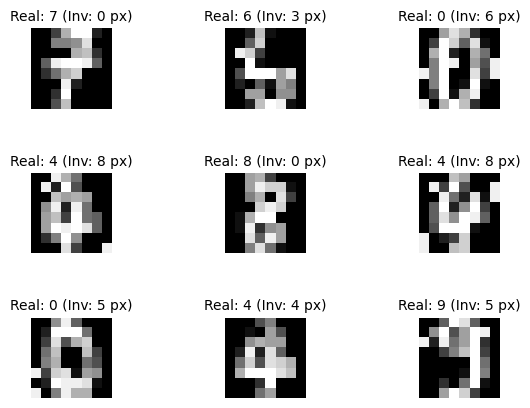

In [200]:
plotSamples(inverted_data, rows, cols, trueLabels, inverted_pixel_counts=inverted_pixel_counts_list)


In [201]:
trainData_inverted1, testData_inverted1, trainLabels_inverted1, testLabels_inverted1 = train_test_split(
    inverted_data, trueLabels, train_size=0.5, stratify=trueLabels)

In [202]:
classifier_inverted = svm.SVC(kernel='rbf', gamma='scale')
classifier_inverted.fit(trainData_inverted1, trainLabels_inverted1)
predictedLabels_inverted = classifier_inverted.predict(testData_inverted1)

In [203]:
trainData_inverted1, testData_inverted1, \
trainLabels_inverted1, testLabels_inverted1, \
train_inverted_pixel_counts, test_inverted_pixel_counts = train_test_split(
    inverted_data, trueLabels, inverted_pixel_counts_list,
    train_size=0.5, stratify=trueLabels, random_state=42)

# Retrain the classifier with the new split
classifier_inverted = svm.SVC(kernel='rbf', gamma='scale')
classifier_inverted.fit(trainData_inverted1, trainLabels_inverted1)

# Make new predictions with the new test data
predictedLabels_inverted1 = classifier_inverted.predict(testData_inverted1)

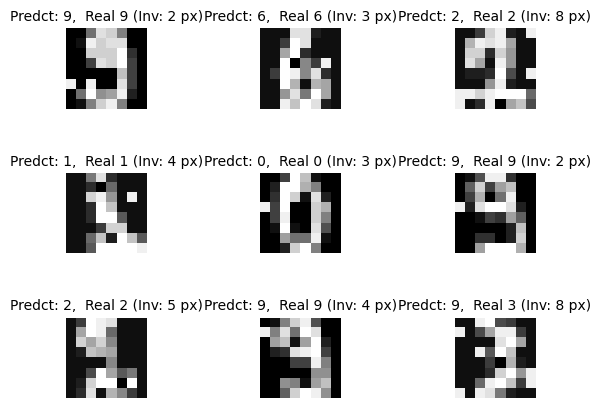

In [204]:
plotSamples(testData_inverted1, rows, cols, testLabels_inverted1, predictedLabels_inverted1, inverted_pixel_counts=test_inverted_pixel_counts)

In [205]:
cm_inverted = confusion_matrix(testLabels_inverted1, predictedLabels_inverted1)

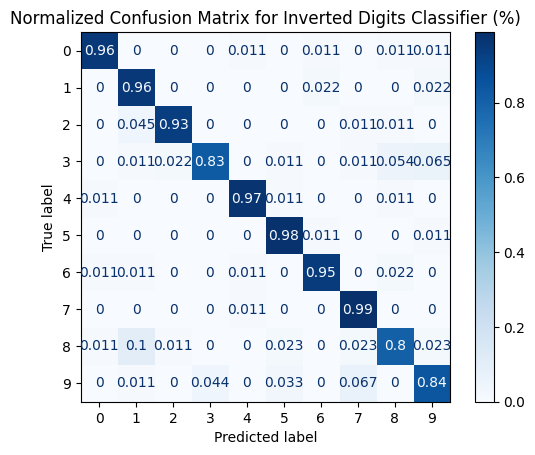

In [206]:
cm_normalized_inverted = cm_inverted.astype('float') / cm_inverted.sum(axis=1)[:, np.newaxis]
disp_inverted = ConfusionMatrixDisplay(confusion_matrix=cm_normalized_inverted, display_labels=digits.target_names)
disp_inverted.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Inverted Digits Classifier (%)')
plt.show()


In [207]:
def plot_digit_by_prediction(digit, is_true_prediction):
    """
    Plots a randomly selected image of a given digit based on prediction accuracy.

    Args:
        digit (int): The digit to search for (0-9).
        is_true_prediction (bool): If True, plots a correctly predicted instance.
                                   If False, plots an incorrectly predicted instance.
    """
    # Filter indices based on the true label matching the requested digit
    target_digit_indices = np.where(testLabels_inverted1 == digit)[0]

    if len(target_digit_indices) == 0:
        print(f"No instances of digit {digit} found in the test set.")
        return

    matching_indices = []
    for idx in target_digit_indices:
        if is_true_prediction and predictedLabels_inverted1[idx] == digit:
            matching_indices.append(idx)
        elif not is_true_prediction and predictedLabels_inverted1[idx] != digit:
            matching_indices.append(idx)

    plt.figure(figsize=(2, 2))
    plt.axis('off')

    if not matching_indices:
        plt.title(f'P=N (No {digit} {'' if is_true_prediction else 'mis'}predicted found)')
        # Plot a blank image for 'P=N'
        plt.imshow(np.zeros((8, 8)), cmap='gray')
        plt.show()
        return None, None, None, None # Return None for all values

    # Select a random matching index
    random_idx = random.choice(matching_indices)
    image_data = testData_inverted1[random_idx]
    true_label = testLabels_inverted1[random_idx]
    predicted_label = predictedLabels_inverted1[random_idx]
    inverted_pixel_count = test_inverted_pixel_counts[random_idx]

    plt.imshow(image_data.reshape(8, 8), cmap='gray')
    plt.title(f'T: {true_label}, P: {predicted_label} (Inv: {inverted_pixel_count} px)')
    plt.show()

    return image_data, true_label, predicted_label, inverted_pixel_count

### Example Usage:

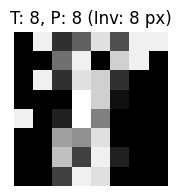

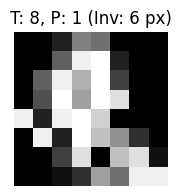

In [208]:
# Example 1: Plot a correctly predicted '8'
result_correct = plot_digit_by_prediction(8, True)

# Example 2: Plot an incorrectly predicted '8'
result_incorrect = plot_digit_by_prediction(8, False)



In [209]:
user_id_str = '213932718'
user_id_digits = []

for digit_char in user_id_str:
    user_id_digits.append(int(digit_char))

print(f"User ID as string: {user_id_str}")
print(f"User ID as list of digits: {user_id_digits}")

User ID as string: 213932718
User ID as list of digits: [2, 1, 3, 9, 3, 2, 7, 1, 8]


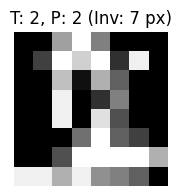

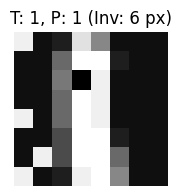

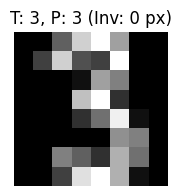

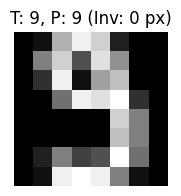

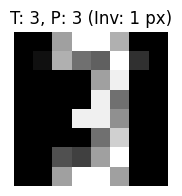

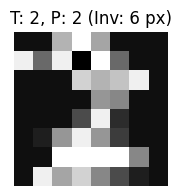

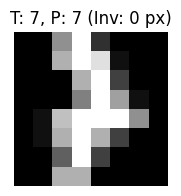

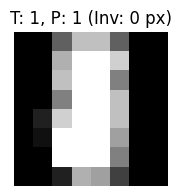

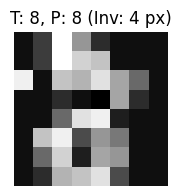

Collected 9 images for user ID digits.


In [210]:
concatenated_images_id = []

print("Collecting correctly predicted images for user ID digits:")

for digit in user_id_digits:
    image_data, true_label, predicted_label, inverted_pixel_count = plot_digit_by_prediction(digit, True)

    if image_data is not None:
        # Reshape the 1D image data to an 8x8 matrix
        reshaped_image = image_data.reshape(8, 8)
        concatenated_images_id.append(reshaped_image)
    else:
        print(f"Warning: Could not find a correctly predicted instance for digit {digit}. Skipping this digit.")

print(f"Collected {len(concatenated_images_id)} images for user ID digits.")

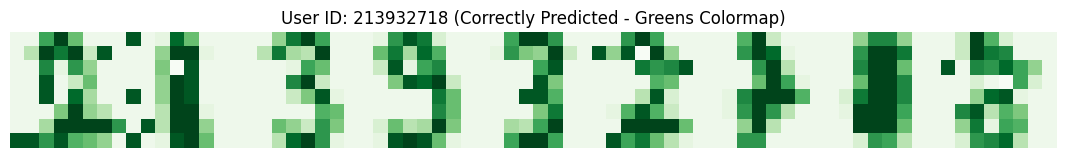

In [211]:
if concatenated_images_id:
    # Concatenate images horizontally
    final_image = np.concatenate(concatenated_images_id, axis=1)

    # Normalize the pixel values to 0-1 for display.
    min_val = final_image.min()
    max_val = final_image.max()

    # Avoid division by zero if all pixels are the same value (e.g., all black or all white)
    if (max_val - min_val) == 0:
        final_image_normalized = np.zeros_like(final_image)
    else:
        final_image_normalized = (final_image - min_val) / (max_val - min_val)

    plt.figure(figsize=(len(user_id_digits) * 1.5, 2))
    # Use cmap='Greens' for green coloring on the normalized 2D image data
    plt.imshow(final_image_normalized, cmap='Greens')
    plt.axis('off')
    plt.title(f"User ID: {''.join(map(str, user_id_digits))}" + " (Correctly Predicted - Greens Colormap)")
    plt.show()
else:
    print("No images were collected to concatenate.")

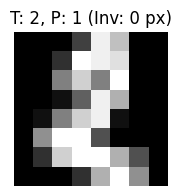

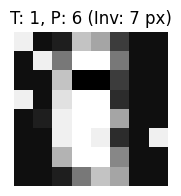

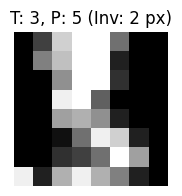

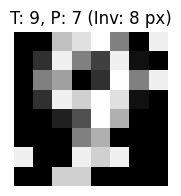

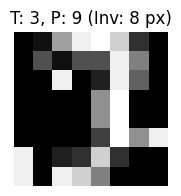

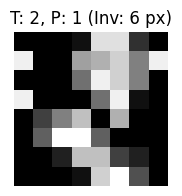

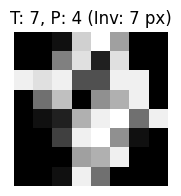

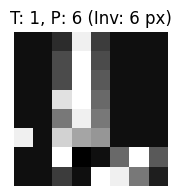

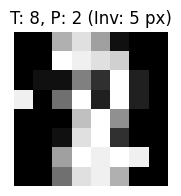

Collected 9 images for wrongly predicted user ID digits.


In [212]:
concatenated_images_id_false = []

print("Collecting wrongly predicted images for user ID digits:")

for digit in user_id_digits:
    image_data, true_label, predicted_label, inverted_pixel_count = plot_digit_by_prediction(digit, False)

    if image_data is not None:
        # Reshape the 1D image data to an 8x8 matrix
        reshaped_image = image_data.reshape(8, 8)
        concatenated_images_id_false.append(reshaped_image)
    else:
        print(f"Warning: Could not find a wrongly predicted instance for digit {digit}. Skipping this digit.")

print(f"Collected {len(concatenated_images_id_false)} images for wrongly predicted user ID digits.")

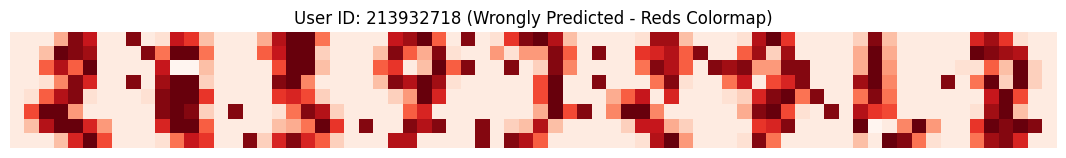

In [213]:
if concatenated_images_id_false:
    # Concatenate images horizontally
    final_image_false = np.concatenate(concatenated_images_id_false, axis=1)

    # Normalize the pixel values to 0-1 for display.
    min_val_false = final_image_false.min()
    max_val_false = final_image_false.max()

    # Avoid division by zero if all pixels are the same value
    if (max_val_false - min_val_false) == 0:
        final_image_normalized_false = np.zeros_like(final_image_false)
    else:
        final_image_normalized_false = (final_image_false - min_val_false) / (max_val_false - min_val_false)

    plt.figure(figsize=(len(user_id_digits) * 1.5, 2))
    # Use cmap='Reds' for red coloring on the normalized 2D image data
    plt.imshow(final_image_normalized_false, cmap='Reds')
    plt.axis('off')
    plt.title(f"User ID: {''.join(map(str, user_id_digits))}" + " (Wrongly Predicted - Reds Colormap)")
    plt.show()
else:
    print("No wrongly predicted images were collected to concatenate.")